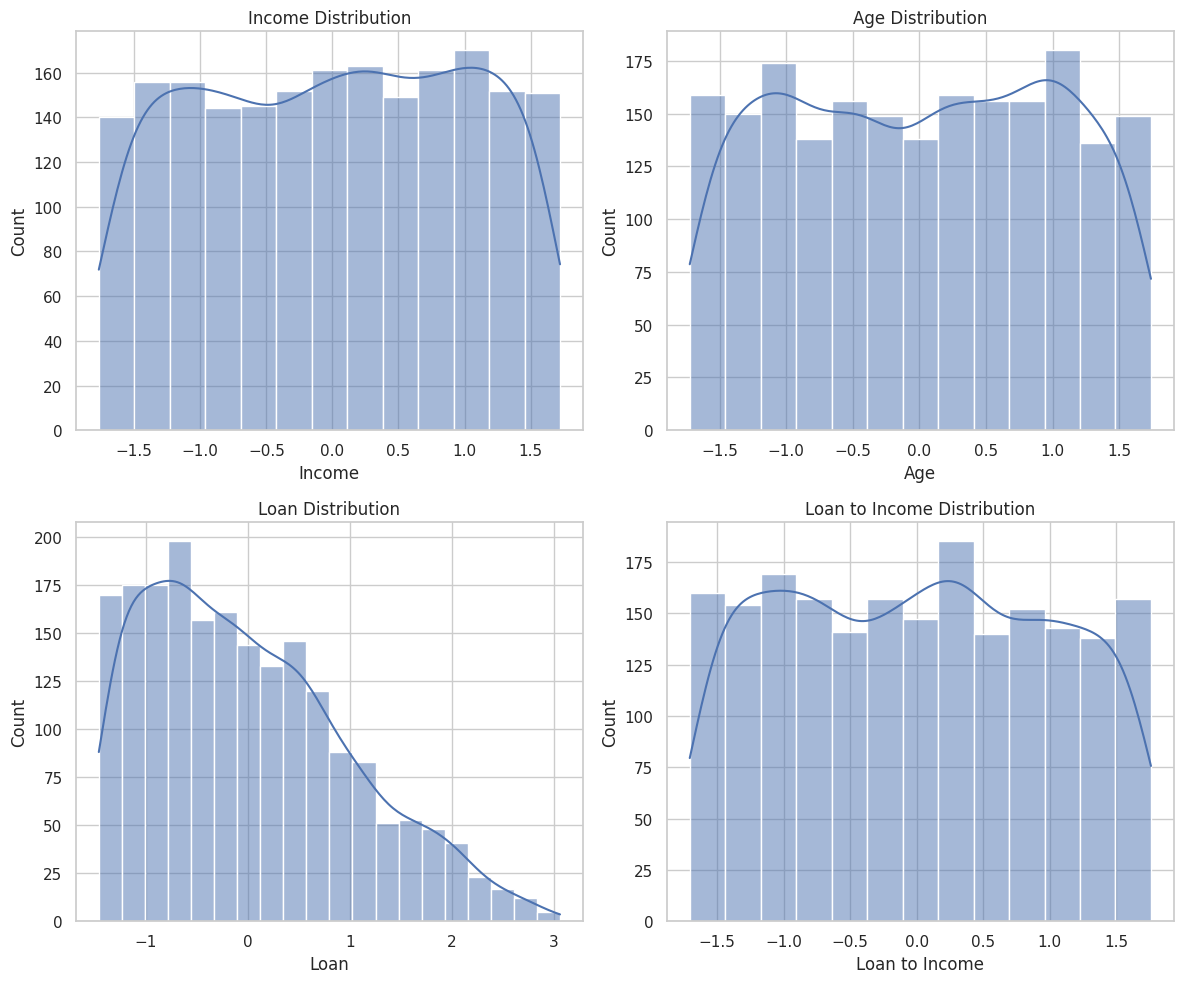

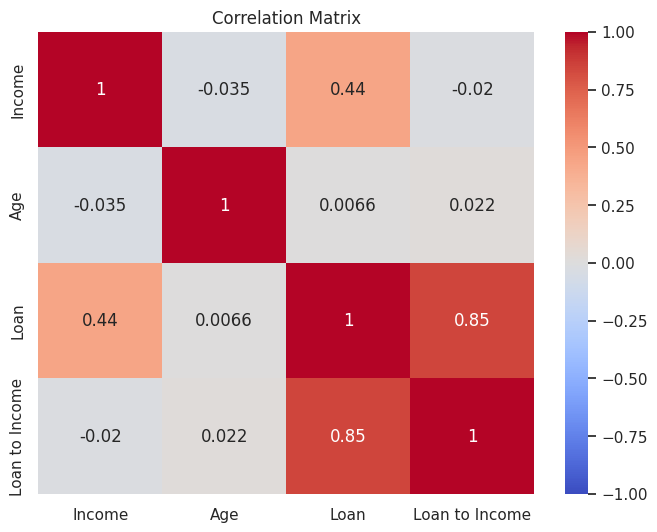

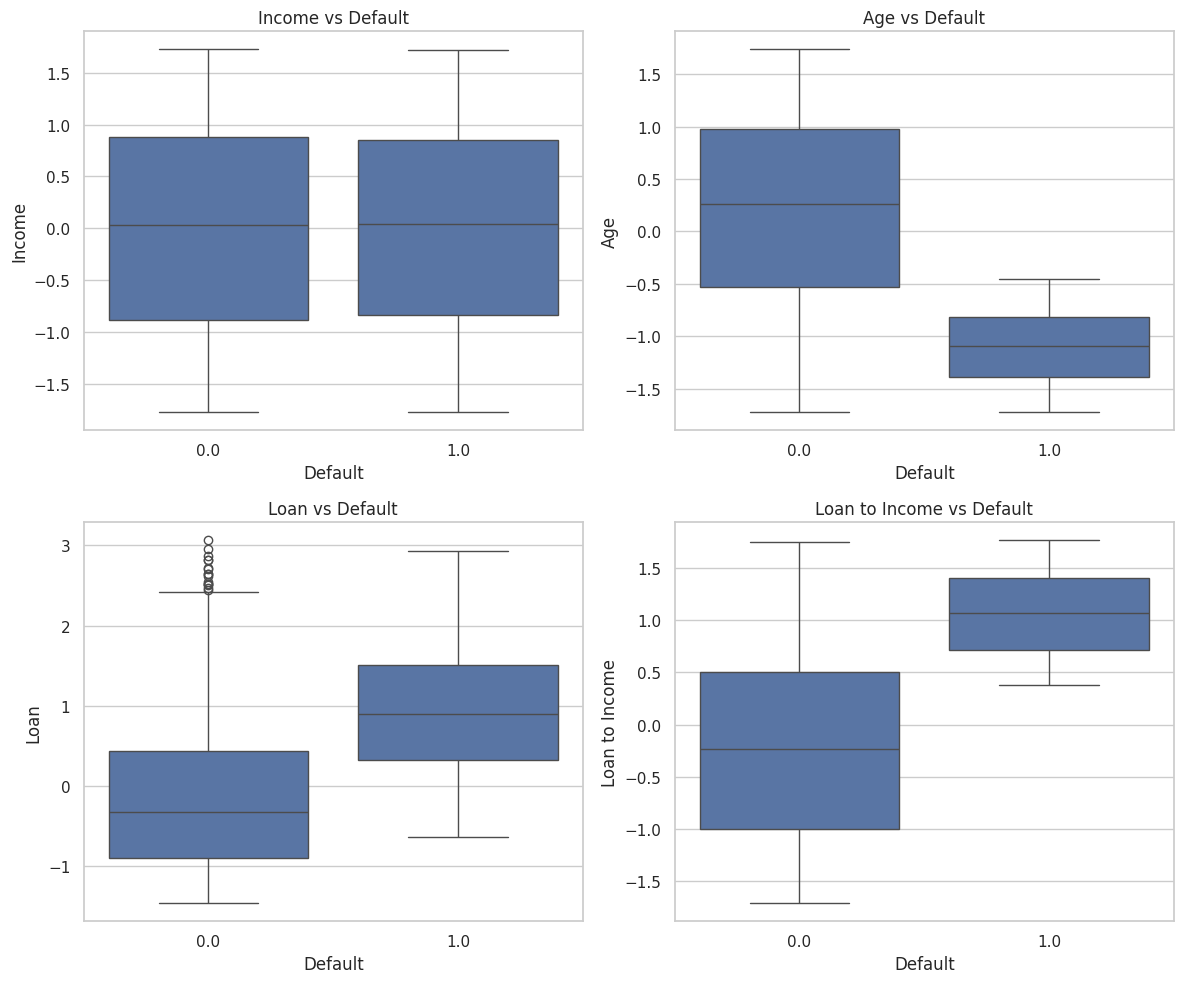

{'Accuracy': 0.9375,
 'Precision': 0.8260869565217391,
 'Recall': 0.8142857142857143,
 'ROC-AUC': 0.888961038961039}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the uploaded file
file_path = "/content/Credit Default.csv"
data = pd.read_csv(file_path)

# Impute missing values if any
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

# Normalize the numerical features
scaler = StandardScaler()
features = data_imputed.drop(columns='Default')
target = data_imputed['Default']
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Prepare results
evaluation_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'ROC-AUC': roc_auc
}

# Visualizations for EDA
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(features_scaled['Income'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution')

sns.histplot(features_scaled['Age'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

sns.histplot(features_scaled['Loan'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Loan Distribution')

sns.histplot(features_scaled['Loan to Income'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Loan to Income Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
correlation_matrix = features_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=target, y=features_scaled['Income'], ax=axes[0, 0])
axes[0, 0].set_title('Income vs Default')

sns.boxplot(x=target, y=features_scaled['Age'], ax=axes[0, 1])
axes[0, 1].set_title('Age vs Default')

sns.boxplot(x=target, y=features_scaled['Loan'], ax=axes[1, 0])
axes[1, 0].set_title('Loan vs Default')

sns.boxplot(x=target, y=features_scaled['Loan to Income'], ax=axes[1, 1])
axes[1, 1].set_title('Loan to Income vs Default')

plt.tight_layout()
plt.show()

evaluation_results
